In [1]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

from generation.data.data_preparation import get_attributes_df, \
                                             get_detector_event_df, \
                                             generate_one_signal, \
                                             postprocess_signal

In [2]:
def build_mass_center(df):
    cur_df = df.copy()
    cur_df['x_energy'] = cur_df['x'] * cur_df['energy']
    cur_df['y_energy'] = cur_df['y'] * cur_df['energy']
    x_mass_center = np.sum(cur_df['x_energy']) / np.sum(cur_df['energy'])
    y_mass_center = np.sum(cur_df['y_energy']) / np.sum(cur_df['energy'])
    
    return x_mass_center, y_mass_center

In [3]:
DETECTOR_NUM = 13
df = get_attributes_df()
df = get_detector_event_df(df, detector=DETECTOR_NUM)

In [4]:
unique_events = df['event'].unique()
events_dfs = [df[df['event'] == int(event)] for event in tqdm.tqdm(unique_events)]

100%|██████████| 74/74 [00:16<00:00,  4.59it/s]


In [5]:
positive_dfs = [event_df[event_df['z'] > 0] for event_df in events_dfs]
negative_dfs = [event_df[event_df['z'] < 0] for event_df in events_dfs]

In [6]:
mass_centres = [build_mass_center(event_df) for event_df in tqdm.tqdm(positive_dfs)]

100%|██████████| 74/74 [00:03<00:00, 23.01it/s]


In [7]:
global_mass_center = build_mass_center(df)

In [8]:
x_coords = [mass_centre[0] for mass_centre in mass_centres]
y_coords = [mass_centre[1] for mass_centre in mass_centres]

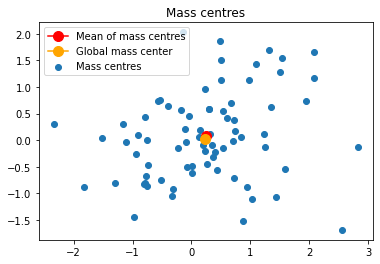

In [11]:
plt.title("Mass centres")
plt.scatter(x_coords, y_coords)
plt.plot(np.mean(x_coords), np.mean(y_coords), marker='o', markersize=10,  color='red')
plt.plot(global_mass_center[0], global_mass_center[1], marker='o', markersize=10, color='orange')
plt.legend(['Mean of mass centres', 'Global mass center', 'Mass centres'])
plt.show()

In [13]:
global_mass_center

(0.22960374943702125, 0.02532815984629382)